In [23]:
import pandas as pd
df = pd.read_csv("covid19indonesia.csv")
df


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


C:\Users\ACER\AppData\Local\Temp\ipykernel_13704\305806606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Case Fatality Rate"] = filtered_df["Case Fatality Rate"].str.replace("%", "").astype(float)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13704\305806606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Case Recovered Rate"] = filtered_df["Case Recovered Rate"].str.replace("%", "").astype(float)


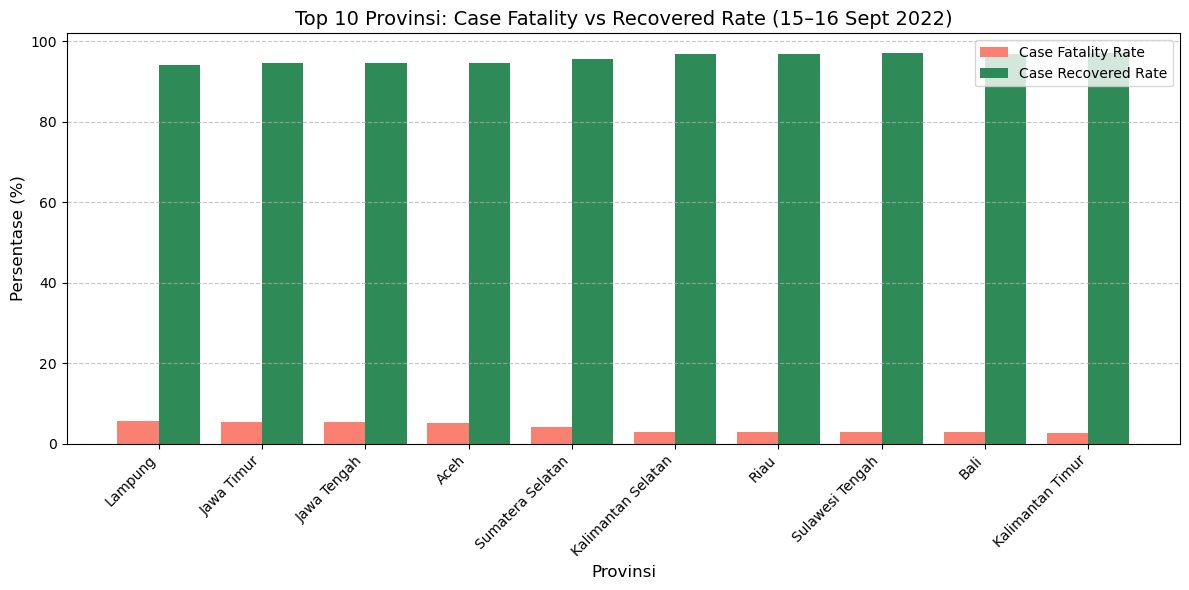

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid19indonesia.csv")
filtered_df = df[df['Date'].isin(["9/15/2022", "9/16/2022"])]
filtered_df["Case Fatality Rate"] = filtered_df["Case Fatality Rate"].str.replace("%", "").astype(float)
filtered_df["Case Recovered Rate"] = filtered_df["Case Recovered Rate"].str.replace("%", "").astype(float)
filtered_df = filtered_df.sort_values(by="Case Fatality Rate", ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(filtered_df))

plt.bar(x, filtered_df["Case Fatality Rate"], width=bar_width, label="Case Fatality Rate", color="salmon")
plt.bar([i + bar_width for i in x], filtered_df["Case Recovered Rate"], width=bar_width, label="Case Recovered Rate", color="seagreen")

plt.xlabel("Provinsi", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.title("Top 10 Provinsi: Case Fatality vs Recovered Rate (15–16 Sept 2022)", fontsize=14)
plt.xticks([i + bar_width/2 for i in x], filtered_df["Location"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
